<h2>Classification Case-Studies: Advanced Model Building Strategies</h2>

<ul>
  <li>Data preprocessing</li>
  <li>Exploratory Data Analysis</li>
  <li>HyperParameter Tuning</li>
  <li>Wrapper-based Feature Selection</li>
  <li>Classification using Logistic Regression - Decision Trees - SVM </li>
</ul>

<h2>Case Study 2: Credit Defaulting Problem</h2>

Given a Taiwanese Bank Database (<b>'tawain-credit-data.xls'</b>) of Credit Loan History for its clients, develop a classification model that will accurately estimate whether a client will pay back the loan or not. The datasets contain 23 features described as follows:

<ul>
<li>X1: Amount of the given credit (NT dollar)</li>
<li>X2: Gender (1 = male; 2 = female).</li>
<li> X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).</li>
<li>X4: Marital status (1 = married; 2 = single; 3 = others).</li>
<li>X5: Age (year).</li>
<li>X6 - X11: History of past payment</li>
<li>X12-X17: Amount of bill statement (NT dollar)</li> 
<li>X18-X23: Amount of previous payment (NT dollar)</li>
</ul>

More details on the datasets (UCI Machine Learning datasets) can be obtained in the follow link:
https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

In [140]:
import warnings
warnings.filterwarnings('ignore')

<b style="color: blue;">Step 1: Load your datasets into pandas</b>

In [141]:
import pandas as pd

df = pd.read_excel('../datasets/taiwan-credit-data.xls')
column_names = list(df.iloc[0,:])
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [142]:
#For computational reasons - Let's use 5% of the datasets
n_perc = 0.3#you can vary that number
df = df.iloc[0:int(len(df)*n_perc),:]

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9000 non-null   object
 1   X1          9000 non-null   object
 2   X2          9000 non-null   object
 3   X3          9000 non-null   object
 4   X4          9000 non-null   object
 5   X5          9000 non-null   object
 6   X6          9000 non-null   object
 7   X7          9000 non-null   object
 8   X8          9000 non-null   object
 9   X9          9000 non-null   object
 10  X10         9000 non-null   object
 11  X11         9000 non-null   object
 12  X12         9000 non-null   object
 13  X13         9000 non-null   object
 14  X14         9000 non-null   object
 15  X15         9000 non-null   object
 16  X16         9000 non-null   object
 17  X17         9000 non-null   object
 18  X18         9000 non-null   object
 19  X19         9000 non-null   object
 20  X20     

In [144]:
df = df.apply(pd.to_numeric, errors = 'coerce')#convert into numeric
df = df.drop([0])
df.columns = column_names
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


<b style="color: blue;">Step 2: Perform EDA using the following requirements</b>
<ol>
  <li>Count the number of rows with missing records - deal with missing values accordingly </li>
  <li>Provide boxplot and density distribution function for each attribute (except Y) in the dataset (optional)</li>
  <li>Provide a barplot that shows the number of data point per class label (see Y)</li>
</ol>

<b style="color: blue;">Step 3: Identify features and the target variable in the problem</b>

In [145]:
X = df.drop(columns=['default payment next month','ID'])
y = df[['default payment next month']]

<b style="color: blue;">Step 4: Scale all features using a Standard Scaler and Split the dataset into Training/Test set (80:20)</b>

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Sc = StandardScaler()
X_sc = Sc.fit_transform(X)#normalisa -> std
X_sc = pd.DataFrame(X_sc,columns = X.columns) #get back the dataframe

X_train,X_test,y_train,y_test = train_test_split(X_sc,y,test_size=0.2,random_state=1234)

<b style="color: blue;">Step 5: Using SVM, Logistic Regression, and DTs, perform hyperparameter tuning and build your models in their best configuration possible.</b>


In [147]:
#Specifiy scorer
from sklearn.metrics import f1_score, make_scorer
f1_scorer = make_scorer(f1_score, average='weighted')

In [148]:
from sklearn.model_selection import GridSearchCV  #Bayesian Search - Hyperparameter
from sklearn.svm import SVC

svm_parameters = {'kernel':('linear','rbf', 'poly'), 'C':(0.01,0.1)}#10^(-3) --- 10^3
svm = SVC()
svm_clf = GridSearchCV(svm, svm_parameters, cv=5, scoring=f1_scorer)# 80/20 (|--->  <---|)
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

{'C': 0.1, 'kernel': 'rbf'}

In [149]:
print('Best score:',svm_clf.best_score_)

Best score: 0.7472528751615803


In [150]:
from sklearn.tree import DecisionTreeClassifier

dt_parameters = {'max_depth':[None, 8, 10], 'min_samples_leaf':[1,2,3]}
dt = DecisionTreeClassifier(random_state=1234)

dt_clf = GridSearchCV(dt, dt_parameters, cv=5)# 80/20 
dt_clf.fit(X_train,y_train)
dt_clf.best_params_

{'max_depth': 8, 'min_samples_leaf': 3}

In [151]:
print('Best score:',dt_clf.best_score_)

Best score: 0.7970565979461045


In [152]:
from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression()
lg_clf.fit(X_train,y_train)

LogisticRegression()

<b style="color: blue;">Step 6: Evaluate each model performance on the test and provide classification reports</b>


In [153]:
from sklearn.metrics import classification_report

y_predict_svm = svm_clf.predict(X_test)
y_predict_dt = dt_clf.predict(X_test)
y_predict_lg = lg_clf.predict(X_test)

report_svm = classification_report(y_test,y_predict_svm,output_dict=True)
report_dt = classification_report(y_test,y_predict_dt,output_dict=True)
report_lg = classification_report(y_test,y_predict_lg,output_dict=True)

print('SVM:\n', classification_report(y_test,y_predict_svm))
print('DT:\n', classification_report(y_test,y_predict_dt))
print('LG:\n', classification_report(y_test,y_predict_lg))


SVM:
               precision    recall  f1-score   support

         0.0       0.80      0.98      0.88      1388
         1.0       0.70      0.19      0.30       412

    accuracy                           0.80      1800
   macro avg       0.75      0.58      0.59      1800
weighted avg       0.78      0.80      0.75      1800

DT:
               precision    recall  f1-score   support

         0.0       0.81      0.94      0.87      1388
         1.0       0.59      0.27      0.37       412

    accuracy                           0.79      1800
   macro avg       0.70      0.61      0.62      1800
weighted avg       0.76      0.79      0.76      1800

LG:
               precision    recall  f1-score   support

         0.0       0.80      0.98      0.88      1388
         1.0       0.76      0.17      0.27       412

    accuracy                           0.80      1800
   macro avg       0.78      0.57      0.58      1800
weighted avg       0.79      0.80      0.74      1800



<b>The best model is the done with the highest F1 score (macro or adjusted)</b> (Performance can be evaluated based on classification accuracy too depending on what you would like to assess - overall prediction or balanced prediction)

<b style="color: blue;">Step 7: Retrain your models using a wrapper based feature selection</b><br/>
Evaluate whether you obtain a performance boost on the test set.

In [154]:
from sklearn.feature_selection import SequentialFeatureSelector


svm_model = SVC(kernel=svm_clf.best_params_['kernel'],C=svm_clf.best_params_['C'])#create model in its best config (and not a Search routine)

svm_clf_sfs = SequentialFeatureSelector(svm_model, scoring=f1_scorer, tol=0.01,direction='backward')
svm_clf_sfs.fit(X_train, y_train)

SequentialFeatureSelector(direction='backward', estimator=SVC(C=0.1),
                          scoring=make_scorer(f1_score, response_method='predict', average=weighted),
                          tol=0.01)

In [155]:
svm_feats = X.columns[svm_clf_sfs.get_support()]
print('DT - Reduced Feature Size:', len(svm_feats),"/",len(X.columns))
svm_feats

DT - Reduced Feature Size: 22 / 23


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [156]:
svm_model.fit(X_train.loc[:,svm_feats],y_train)#retrain the model on smaller subset

SVC(C=0.1)

In [157]:
dt_model = DecisionTreeClassifier(max_depth=dt_clf.best_params_['max_depth'],min_samples_leaf=dt_clf.best_params_['min_samples_leaf'],
                            random_state=1234)

dt_clf_sfs = SequentialFeatureSelector(dt_model, scoring=f1_scorer, tol=0.005,direction='backward')
dt_clf_sfs.fit(X_train, y_train)

SequentialFeatureSelector(direction='backward',
                          estimator=DecisionTreeClassifier(max_depth=8,
                                                           min_samples_leaf=3,
                                                           random_state=1234),
                          scoring=make_scorer(f1_score, response_method='predict', average=weighted),
                          tol=0.005)

In [158]:
dt_feats = X.columns[dt_clf_sfs.get_support()]
print('DT - Reduced Feature Size:', len(dt_feats),"/",len(X.columns))
dt_feats

DT - Reduced Feature Size: 22 / 23


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [159]:
dt_model.fit(X_train.loc[:,dt_feats],y_train)#retrain the model on smaller subset

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, random_state=1234)

In [160]:
lg_model_sfs = SequentialFeatureSelector(lg_model, scoring=f1_scorer, tol=0.001,direction='backward')
lg_model_sfs.fit(X_train, y_train)

lg_feats = X.columns[lg_model_sfs.get_support()]
print('LG - Reduced Feature Size:', len(lg_feats),"/",len(X.columns))
lg_feats

LG - Reduced Feature Size: 22 / 23


Index(['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [161]:
lg_model = LogisticRegression()
lg_model.fit(X_train.loc[:,lg_feats],y_train)#retrain the model on smaller subset

LogisticRegression()

In [162]:
y_predict_svm_sfs = svm_model.predict(X_test.loc[:,svm_feats])
y_predict_dt_sfs = dt_model.predict(X_test.loc[:,dt_feats])
y_predict_lg_sfs = lg_model.predict(X_test.loc[:,lg_feats])

report_svm_sfs = classification_report(y_test,y_predict_svm_sfs,output_dict=True)
report_dt_sfs = classification_report(y_test,y_predict_dt_sfs,output_dict=True)
report_lg_sfs = classification_report(y_test,y_predict_lg_sfs,output_dict=True)

print('SVM - %d Feature(s):\n'%len(svm_feats), classification_report(y_test,y_predict_svm_sfs))
print('DT - %d Feature(s):\n'%len(dt_feats), classification_report(y_test,y_predict_dt_sfs))
print('LG - %d Feature(s):\n'%len(lg_feats), classification_report(y_test,y_predict_lg_sfs))

SVM - 22 Feature(s):
               precision    recall  f1-score   support

         0.0       0.80      0.98      0.88      1388
         1.0       0.70      0.19      0.30       412

    accuracy                           0.80      1800
   macro avg       0.75      0.58      0.59      1800
weighted avg       0.78      0.80      0.75      1800

DT - 22 Feature(s):
               precision    recall  f1-score   support

         0.0       0.81      0.95      0.88      1388
         1.0       0.61      0.27      0.38       412

    accuracy                           0.79      1800
   macro avg       0.71      0.61      0.63      1800
weighted avg       0.77      0.79      0.76      1800

LG - 22 Feature(s):
               precision    recall  f1-score   support

         0.0       0.80      0.98      0.88      1388
         1.0       0.76      0.17      0.28       412

    accuracy                           0.80      1800
   macro avg       0.78      0.58      0.58      1800
weighted a

<b style="color: blue;">Step 8: Compare Model Performances with and without Wrapper-based FS on bar plots</b><br/>

In [163]:
f1_scores_sfs = [0]*3
f1_scores_sfs[0] = report_svm_sfs['weighted avg']['f1-score']
f1_scores_sfs[1] = report_dt_sfs['weighted avg']['f1-score']
f1_scores_sfs[2] = report_lg_sfs['weighted avg']['f1-score']


f1_scores_orig= [0]*3
f1_scores_orig[0] = report_svm['weighted avg']['f1-score']
f1_scores_orig[1] = report_dt['weighted avg']['f1-score']
f1_scores_orig[2] = report_lg['weighted avg']['f1-score']

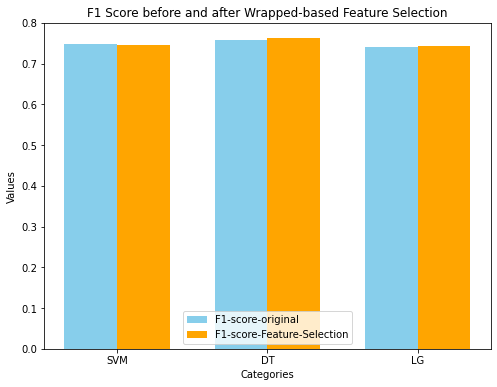

In [164]:
import numpy as np
import matplotlib.pyplot as plt


categories = ['SVM', 'DT', 'LG']
values1 = f1_scores_orig  # First set of values
values2 = f1_scores_sfs  # Second set of values

# Define the width of the bars
bar_width = 0.35

# Set the positions for the bars
x = np.arange(len(categories))

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(x - bar_width/2, values1, width=bar_width, label='F1-score-original', color='skyblue')
plt.bar(x + bar_width/2, values2, width=bar_width, label='F1-score-Feature-Selection', color='orange')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('F1 Score before and after Wrapped-based Feature Selection')
plt.xticks(x, categories)  # Set x-axis labels to category names
plt.legend()  # Add legend

# Display the plot
plt.show()
